In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def is_terminal(state, grid_size=4):
    return state in ((0, 0), (grid_size - 1, grid_size - 1))


def step(state, action, grid_size=4):
    """
    Returns next state and reward given a current state and an action.
    """
    
    if is_terminal(state, grid_size=grid_size):
        return state, 0
    
    x, y = state
    dx, dy = action
    x = np.clip(x + dx, 0, grid_size - 1)
    y = np.clip(y + dy, 0, grid_size - 1)
    new_state = (x, y)
    
    return new_state, -1

# Policy Evaluation

In [12]:
def policy_evaluation(policy, V, gamma, theta, grid_size):
    """
    Policy Evaluation Loop
    """
    
    while True:
        delta = 0
        new_V = np.copy(V)
        
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                
                if is_terminal(state, grid_size=grid_size):
                    continue
                
                state_value = 0
                for action in policy[state]:
                    next_state, reward = step(state, action, grid_size=grid_size)
                    state_value += (1 / len(policy[state])) * (reward + gamma * V[next_state])
                
                new_V[i, j] = state_value
                delta = max(delta, abs(V[i, j] - state_value))
        
        V = new_V
        if delta < theta:
            break
    
    return V

# Policy Improvement Loop

In [13]:
def policy_improvement(policy, V, gamma, grid_size):
    """
    Policy Improvement Loop
    """
    
    policy_stable = True
    new_policy = {}
    
    for i in range(grid_size):
        for j in range(grid_size):
            state = (i, j)
            
            if is_terminal(state, grid_size):
                continue
            
            best_action = None
            best_value = float('-inf')
            for action in actions:
                next_state, reward = step(state, action, grid_size=grid_size)
                value = reward + gamma * V[next_state]
                if value > best_value:
                    best_value = value
                    best_action = action
            
            if policy[state] != [best_action]:
                policy_stable = False
            
            new_policy[state] = [best_action]
    
    return new_policy, policy_stable

In [14]:
def policy_iteration(policy, grid_size=4, gamma=1.0, theta=1e-6):
    """
    Policy Iteration Loop
    """

    # Initialize state value function
    state_value_function = np.zeros((grid_size, grid_size))
    
    n = 0
    while True:
        n += 1

        # One step of policy evaluation
        state_value_function = policy_evaluation(policy, state_value_function, gamma, theta, grid_size)
        
        # ... followed by one step of policy improvement
        policy, stable = policy_improvement(policy, state_value_function, gamma, grid_size)
        
        if stable:
            print(f'Done in {n} iterations')
            return policy, state_value_function

### Plot functions

In [15]:
def plot_value_function(V, size=4):
    plt.figure(figsize=(6, 6))
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    for i in range(size):
        for j in range(size):
            plt.text(j, i, f"{V[i, j]:.1f}", ha='center', va='center', color='black')
    plt.title(f"State Value Function of Random Uniform Policy")
    plt.show()

def plot_policy(policy, grid_size=4):
    """
    Plots a given policy
    """

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(-0.5, grid_size - 0.5)
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticks(np.arange(grid_size) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size) - 0.5, minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=3)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    
    action_arrows = {(-1, 0): "↑", (1, 0): "↓", (0, -1): "←", (0, 1): "→"}
    for i in range(grid_size):
        for j in range(grid_size):
            if is_terminal((i, j), grid_size=grid_size):
                ax.text(j, grid_size - 1 - i, "T", ha='center', va='center', fontsize=20, fontweight='bold')
            else:
                action = policy[(i, j)][0]
                ax.text(j, grid_size - 1 - i, action_arrows[action], ha='center', va='center', fontsize=20)
    
    plt.show()

# Policy Iteration

In [16]:
# Grid world parameters
GRID_SIZE = 4

# Action Space
actions = (
    (-1, 0),  # UP
    (1, 0),   # DOWN
    (0, -1),  # LEFT
    (0, 1)    # RIGHT
)

# Discount factor
GAMMA = 1.0 

# Convergence threshold
THETA = 1e-6

Done in 3 iterations


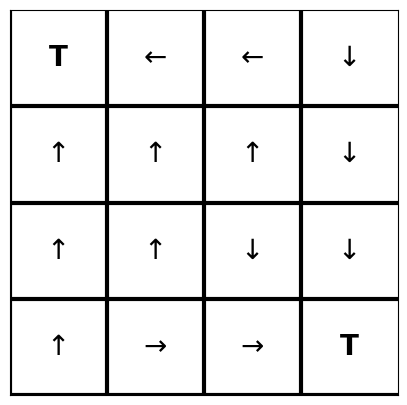

In [17]:
# Uniform random policy
uniform_random_policy = { 
    (i, j): actions 
    for i in range(GRID_SIZE) 
    for j in range(GRID_SIZE) 
    if not is_terminal((i, j), grid_size=GRID_SIZE) 
}

optimal_policy, optimal_value_function = policy_iteration(
    uniform_random_policy, 
    grid_size=GRID_SIZE,
    gamma=GAMMA,
    theta=THETA
)

# Plot the final policy
plot_policy(optimal_policy, grid_size=GRID_SIZE)

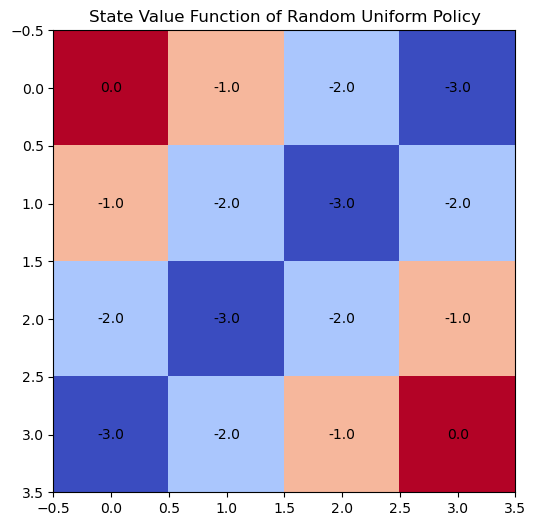

In [18]:
plot_value_function(optimal_value_function)